# 1. Setup
   

https://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf

## 1.1 Install dependencies
   

In [ ]:
# %pip install tensorflow opencv-python matplotlib

## 1.2 Import dependencies
   

In [2]:
# import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

Here's a concise rundown of how we'll harness these libraries:

- `cv2`: This library, often known as OpenCV, is our go-to for adept image manipulation.
- `os`: Our partner in managing directories, making it simpler to navigate and organize our files.
- `random`: Vital for randomization, an essential aspect in machine learning.
- `numpy`: The cornerstone for manipulating tensors, an indispensable part of our work.
- `matplotlib`: A trusted ally for presenting images visually in our project.

In [3]:
# import tensorflow dependencies
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf


Our project takes on a siamese network approach, facilitating the comparison of two images for verification. By assessing the similarity between these images, our network will categorize them as matching (output: 1) or non-matching (output: 0). We'll orchestrate this using the `Model` class for model creation, custom layers for designing intricate components, `Conv2D` for convolutional operations, `Dense` for connecting layers, `MaxPooling2D` for dimensionality reduction, and `Flatten` to convert two-dimensional data into vectors.


![Opera Snapshot_2023-08-25_132451_www.cs.cmu.edu.png](<attachment:Opera Snapshot_2023-08-25_132451_www.cs.cmu.edu.png>)
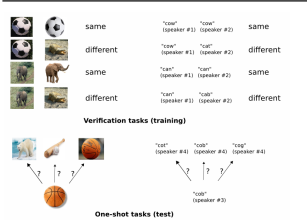

## 1.3 Create folder structures
   


In this phase, we'll arrange our data into distinct folders to ensure an organized approach to our project:

In [4]:
#setup paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

Here's a concise summary of this step:

- **Positive Folder**: Reserved for images that match.
- **Negative Folder**: Dedicated to images that do not match.
- **Anchor Folder**: Home to real-time images.

In [5]:
# make the directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)